In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pygame

# Nonlinear waves

## Special case: Linear waves

### Discrete case: Particles connected by linear springs

In [3]:
N = 1000 # number of particles
k = 1.0 # wave number
x = np.linspace(0, 2.0 * np.pi, 100)
T = 10.0 # duration of simulation
dt = 0.01 # time step 
ts = np.arange(0, T, dt) # time array

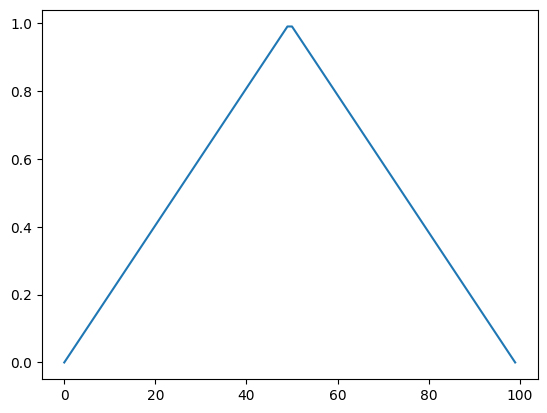

In [4]:
# Define initial conditions
def initial_condition(x) : 
    return -(abs(x-np.pi) - np.pi)/np.pi

u = initial_condition(x)
v = np.zeros_like(u)

plt.plot(u)

In [7]:
def Laplacian(x) :  
    dx = x[1]-x[0]
    L = np.diag(-2 * np.ones_like(x)) + np.diag(np.ones_like(x)[1:], -1) + np.diag(np.ones_like(x)[1:], 1)
    L[0, :] = 0
    L[-1, :] = 0
    return L/(dx*dx)

L = Laplacian(x)
def F(u, v, x, t) : 
    return k * L @ u * (1 + 0.1 * u - 0.01 * v**2)

def F_burgers(u, v, x, t) : 
    return 

def update(u, v, x, t) : 
    v = v + F(u, v, x, t) * dt
    u = u + v * dt
    return u, v 

In [8]:
# Initialize Pygame
pygame.init()

# Set up some constants
WIDTH, HEIGHT = 800, 400
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

# Set up the display
screen = pygame.display.set_mode((WIDTH, HEIGHT))

# Initialize wave
u = initial_condition(x)
v = np.zeros_like(u)

# Main loop
running = True
t = 0
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Fill the screen with white
    screen.fill(WHITE)

    # Draw the current wave
    u_min, u_max = -1.0, 1.0
    u_scaled = (u - u_min) / (u_max - u_min) * HEIGHT
    for i in range(len(u)):
        X = int(i / len(u) * WIDTH)
        Y = int(HEIGHT - u_scaled[i])
        pygame.draw.line(screen, BLACK, (X, Y), (X, Y), 2)

    u, v = update(u, v, x, t)

    # Update the display
    pygame.display.flip()

    # Update the time
    t += dt

    # Limit the frame rate
    pygame.time.delay(1)

# Quit Pygame
pygame.quit()